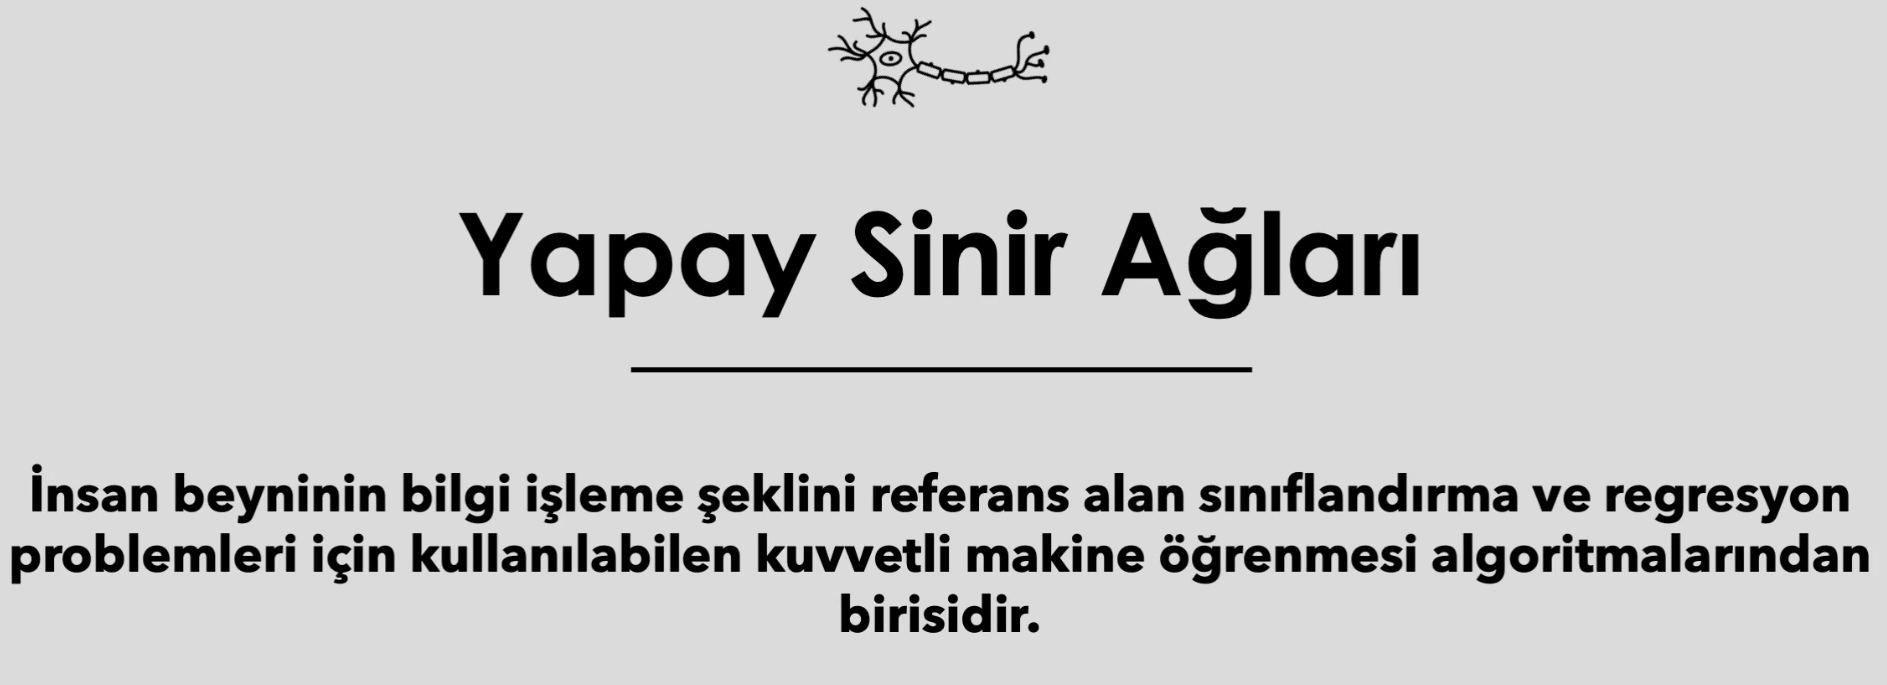

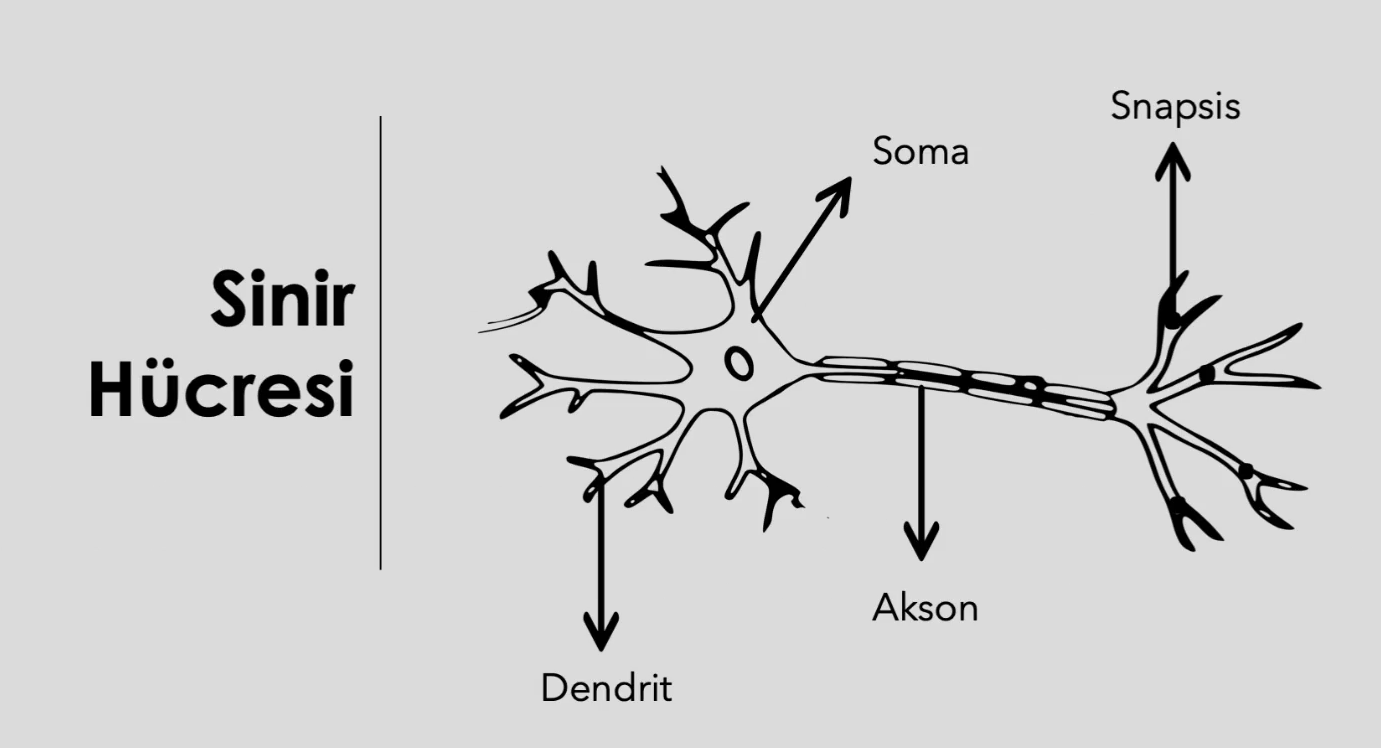

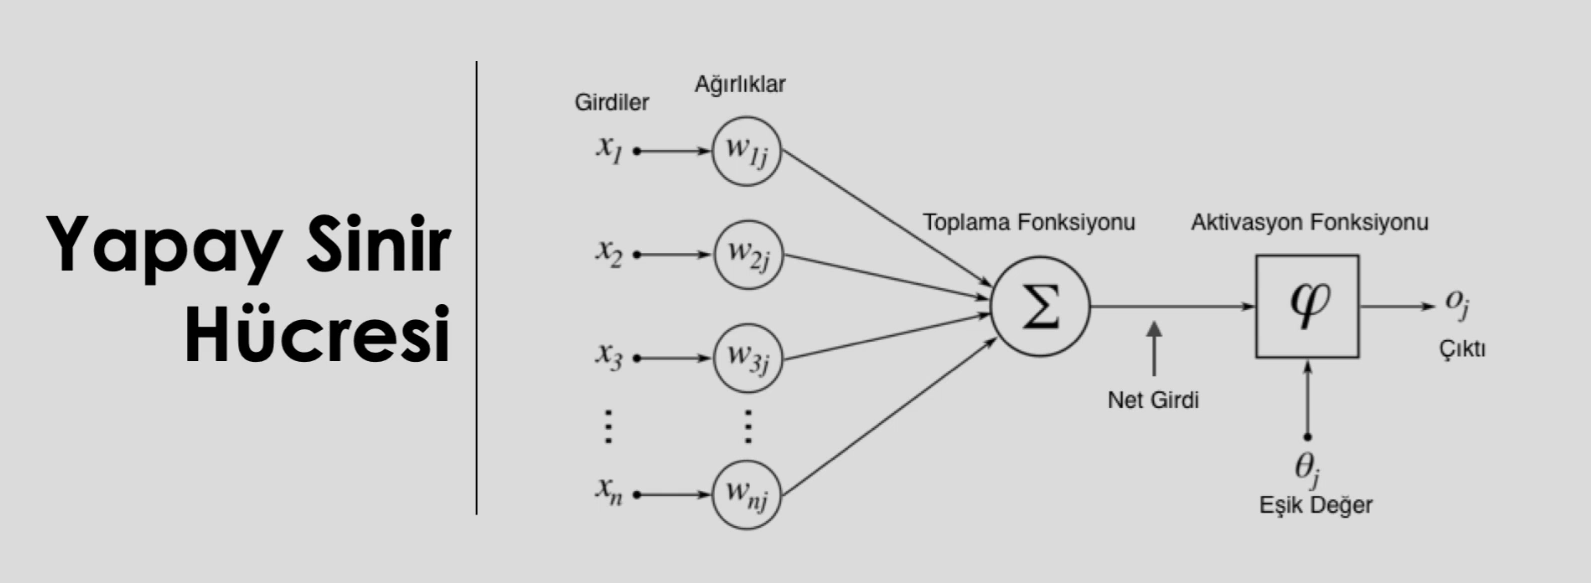

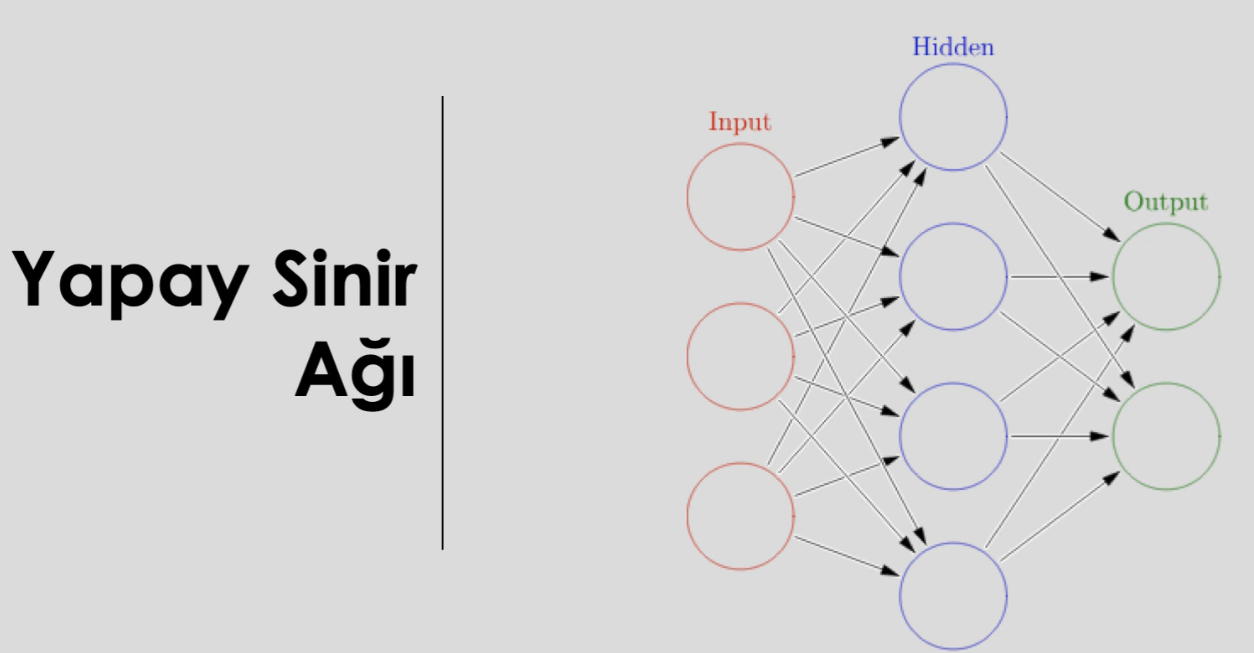

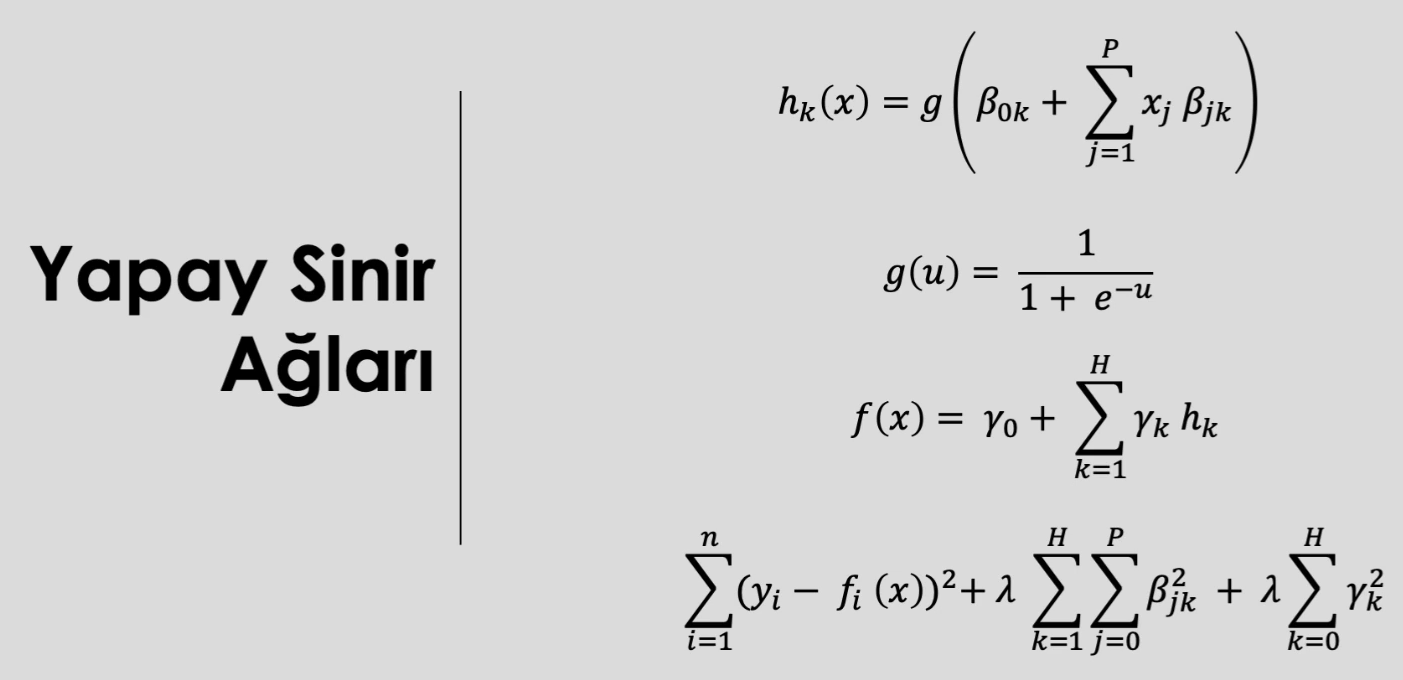

### YSA Model

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, ShuffleSplit, GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor

from warnings import filterwarnings
filterwarnings('ignore')

In [8]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[["League","Division","NewLeague"]])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'],axis=1).astype("float64")
X = pd.concat([X_ ,dms[["League_N","Division_W","NewLeague_N"]]],axis=1)

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X , y, test_size=0.25, random_state=42)

In [9]:
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
scaler.fit(X_Train)

StandardScaler()

In [12]:
X_Train_Scaled  = scaler.transform(X_Train)

In [13]:
X_Test_Scaled = scaler.transform(X_Test)

In [14]:
from sklearn.neural_network import MLPRegressor

In [31]:
mlp_model= MLPRegressor(hidden_layer_sizes=(100,20)).fit(X_Train_Scaled, Y_Train)

In [32]:
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [33]:
mlp_model.n_layers_

4

In [34]:
mlp_model.hidden_layer_sizes

(100, 20)

In [35]:
mlp_model.predict(X_Train_Scaled)[0:5]

array([ 75.87707015, 465.24833542, 282.89641589,  49.83642888,
        48.9756196 ])

In [36]:
y_pred = mlp_model.predict(X_Test_Scaled)
np.sqrt(mean_squared_error(Y_Test, y_pred))

436.97965013666385

### Model Tuning

In [37]:
mlp_model.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 20),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [38]:
mlp_params = {'alpha' : [0.1, 0.01, 0.02, 0.005],
              'hidden_layer_sizes' : [(20,20),(100,50,150),(300,200,150)],
              'activation' : ['relu', 'logistic']}

In [39]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv=10)

In [41]:
mlp_cv_model.fit(X_Train_Scaled, Y_Train).get_params()

{'cv': 10,
 'error_score': nan,
 'estimator__activation': 'relu',
 'estimator__alpha': 0.0001,
 'estimator__batch_size': 'auto',
 'estimator__beta_1': 0.9,
 'estimator__beta_2': 0.999,
 'estimator__early_stopping': False,
 'estimator__epsilon': 1e-08,
 'estimator__hidden_layer_sizes': (100, 20),
 'estimator__learning_rate': 'constant',
 'estimator__learning_rate_init': 0.001,
 'estimator__max_fun': 15000,
 'estimator__max_iter': 200,
 'estimator__momentum': 0.9,
 'estimator__n_iter_no_change': 10,
 'estimator__nesterovs_momentum': True,
 'estimator__power_t': 0.5,
 'estimator__random_state': None,
 'estimator__shuffle': True,
 'estimator__solver': 'adam',
 'estimator__tol': 0.0001,
 'estimator__validation_fraction': 0.1,
 'estimator__verbose': False,
 'estimator__warm_start': False,
 'estimator': MLPRegressor(hidden_layer_sizes=(100, 20)),
 'n_jobs': None,
 'param_grid': {'alpha': [0.1, 0.01, 0.02, 0.005],
  'hidden_layer_sizes': [(20, 20), (100, 50, 150), (300, 200, 150)],
  'activati

In [42]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (100, 50, 150)}

In [43]:
mlp_tuned = MLPRegressor(alpha=0.02, hidden_layer_sizes = (100,50,150))

In [45]:
mlp_tuned.fit(X_Train_Scaled, Y_Train).get_params()

{'activation': 'relu',
 'alpha': 0.02,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 50, 150),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': None,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [46]:
y_pred = mlp_tuned.predict(X_Test_Scaled)
np.sqrt(mean_squared_error(Y_Test, y_pred))

360.45457545056354